In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sn
import scipy

pd.set_option("display.precision", 2)

# Load dataset
df = pd.read_csv("first_data.csv", index_col=False, header=0)

print(df.head())

    tree  pollution  life_quality  living_costs     PPI  satisfaction  \
0  16.26      30.65        170.92         72.01  101.10            97   
1  43.77      25.10        178.68         77.52   95.61            97   
2  14.88      70.11        131.99         65.19   67.23            87   
3  13.05      57.01        117.55         58.97   40.03            64   
4  36.79      17.74        181.79         68.36   79.56            94   

   property_income high_l     city  
0            10.90    low  Hamburg  
1            16.24   high   Munich  
2             7.29    low    Turin  
3            11.78    low   Athens  
4            13.96   high   Vienna  


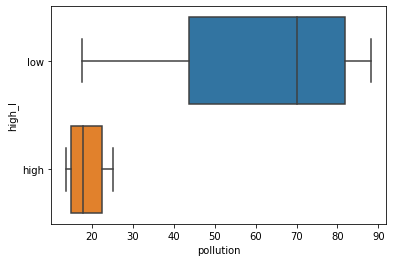

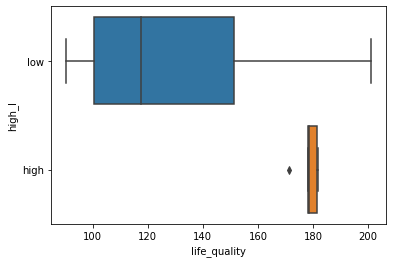

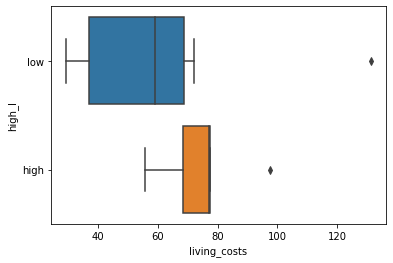

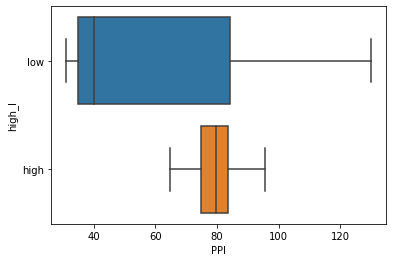

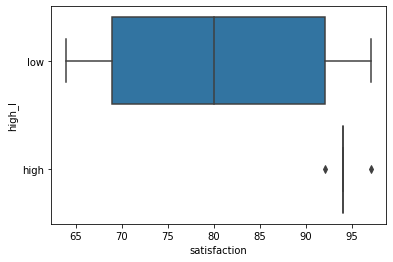

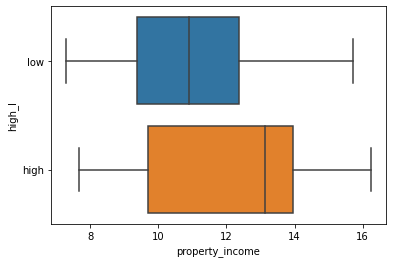

In [11]:
sn.boxplot( x=df["pollution"], y=df["high_l"] )
plt.show()
sn.boxplot( x=df["life_quality"], y=df["high_l"] )
plt.show()
sn.boxplot( x=df["living_costs"], y=df["high_l"] )
plt.show()
sn.boxplot( x=df["PPI"], y=df["high_l"] )
plt.show()
sn.boxplot( x=df["satisfaction"], y=df["high_l"] )
plt.show()
sn.boxplot( x=df["property_income"], y=df["high_l"] )
plt.show()

In [3]:
df["high_l"].describe()

count      12
unique      2
top       low
freq        7
Name: high_l, dtype: object

In [2]:
print(df.groupby('high_l').mean())

         tree  pollution  life_quality  living_costs    PPI  satisfaction  \
high_l                                                                      
high    43.98       18.8        178.24         75.28  79.68         94.20   
low     15.82       61.0        130.37         61.46  62.72         80.43   

        property_income  
high_l                   
high              12.14  
low               11.05  


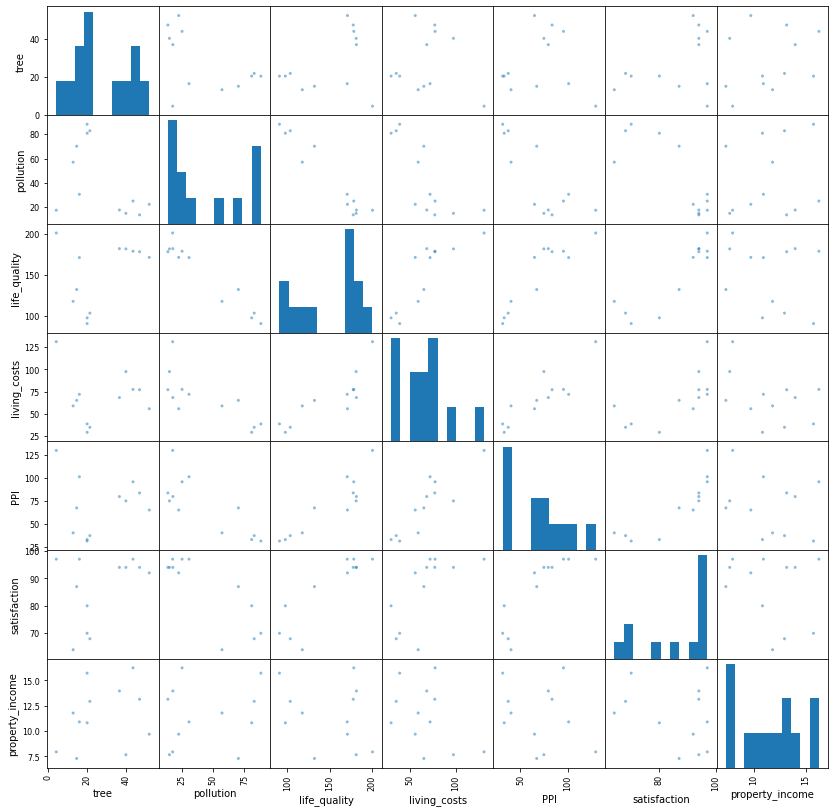

In [12]:
pd.plotting.scatter_matrix(df, figsize=(14,14), range_padding=0.2);
plt.show()

In [13]:
# Normalize
v_norm = ["tree","pollution","life_quality","living_costs","PPI","satisfaction","property_income"]

#0-1 Normalization
df[v_norm] = (df[v_norm] - np.min(df[v_norm])) / (np.max(df[v_norm]) - np.min(df[v_norm]))

print(df.head())

   tree  pollution  life_quality  living_costs   PPI  satisfaction  \
0  0.25       0.23          0.73          0.42  0.71          1.00   
1  0.83       0.15          0.80          0.47  0.65          1.00   
2  0.22       0.76          0.38          0.35  0.37          0.70   
3  0.18       0.58          0.25          0.29  0.09          0.00   
4  0.68       0.05          0.83          0.38  0.49          0.91   

   property_income high_l     city  
0             0.40    low  Hamburg  
1             1.00   high   Munich  
2             0.00    low    Turin  
3             0.50    low   Athens  
4             0.75   high   Vienna  


In [14]:
model = smf.ols("tree ~ pollution + life_quality + living_costs + PPI + satisfaction", data=df)
m = model.fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   tree   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     5.455
Date:                Tue, 21 Jun 2022   Prob (F-statistic):             0.0310
Time:                        21:40:36   Log-Likelihood:                 7.2023
No. Observations:                  12   AIC:                            -2.405
Df Residuals:                       6   BIC:                            0.5048
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3924      0.932      0.421   

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:              pollution   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     3.543
Date:                Tue, 21 Jun 2022   Prob (F-statistic):             0.0892
Time:                        21:40:52   Log-Likelihood:                -3.7274
No. Observations:                  12   AIC:                             11.45
Df Residuals:                      10   BIC:                             12.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7037      0.193      3.652      0.0

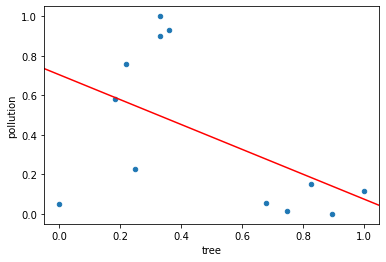

In [15]:
# Plot data and regression line
model2 = smf.ols("pollution ~ tree", data=df)
m2 = model2.fit()
print(m2.summary())

fig = df.plot.scatter(x="tree", y="pollution");
sm.graphics.abline_plot(model_results=m2, ax=fig.axes, c="red");
plt.show()

In [16]:
from statsmodels.stats.weightstats import ttest_ind

low = df[df["high_l"]=="low"]["pollution"]
high = df[df["high_l"]=="high"]["pollution"]

ttest = ttest_ind(x1=low, x2=high, alternative="two-sided", usevar="pooled")
print("t = {:.1f}, p-value = {:.1g}, df = {:.0f}".format(ttest[0],ttest[1],ttest[2]))

t = 3.4, p-value = 0.007, df = 10


In [17]:
from scipy.stats import mannwhitneyu

(W, p) = mannwhitneyu(x=low, y=high, use_continuity=True, alternative='two-sided')
print("W = {:.0f}, p-value = {:.1g}".format(W, p))

W = 32, p-value = 0.02


In [18]:
p = df["pollution"]
t = df["tree"]
l = df["life_quality"]
print(scipy.stats.pearsonr(p, t))
print(scipy.stats.pearsonr(p, l))
print(scipy.stats.pearsonr(t, l))

(-0.5115050856451993, 0.08916881110527657)
(-0.9685597223331925, 2.29502785142043e-07)
(0.3874120087933389, 0.21341078781301884)


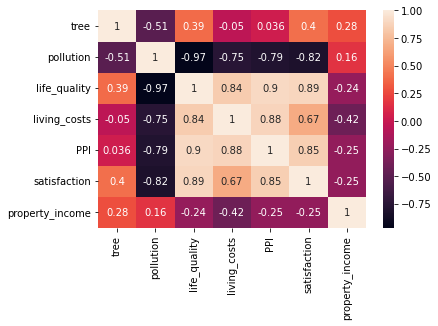

In [19]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()